
> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt


democracy_data = pd.read_excel('indicatorpolityiv.xlsx', sheet_name = "Data" )
hours_per_week = pd.read_excel('indicator_hours per week.xlsx', sheet_name = "Data" )
billionaires_per_million = pd.read_excel('Indicator_Number of billionaires per 1 million inhabitants.xlsx', sheet_name = "Data" )
fdi_data = pd.read_excel('Foreign investment outflow.xlsx', sheet_name = "Data" )
total_pop = pd.read_excel('indicator gapminder population.xlsx', sheet_name = "Data" )
pop_growth = pd.read_excel('population growth.xlsx', sheet_name = "Data" )


<a id='wrangling'></a>
## Data Wrangling


### General Properties

### Next few Cells will be used to gain understanding of data structures and expected values
> **Note**: anomolies that are notices will be called out with a Markdown Cell and corrected in the next

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
democracy_data.head()

,"Democracy, based on PolityIV",1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,-3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


Note: Akrotiri and Dhekelia are one country

In [3]:
democracy_data['Democracy, based on PolityIV'].nunique()

275

In [4]:
democracy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 213 entries, Democracy, based on PolityIV to 2011
dtypes: float64(212), object(1)
memory usage: 457.7+ KB


In [5]:
democracy_data.shape

(275, 213)

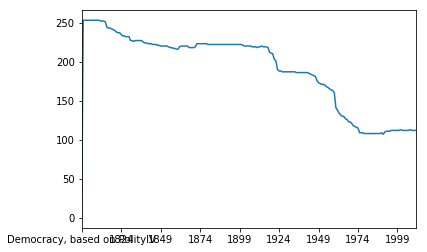

In [6]:
democracy_data.isnull().sum().plot()

Less nulls as time goes one, at least on average

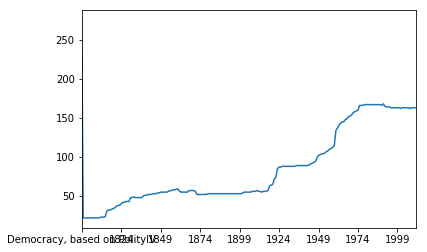

In [7]:
democracy_data.notnull().sum().plot()

In [8]:
total_pop.head()

,Total population,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


In [9]:
hours_per_week.head()

,Working hours per week,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,34.578846,34.578846,34.376923,34.117307,34.415384,34.338461,34.482692,34.655769,34.819230,...,34.394231,34.363462,34.332693,33.742307,33.467309,33.411539,33.596154,33.298077,33.140386,33.109614
2,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.990385,31.492307,31.378845,31.351924,31.384615,31.567308,31.736539,31.844231,31.817308,31.761345
3,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belgium,NaN,NaN,NaN,34.000000,34.480769,34.596154,34.211538,33.903846,33.653846,...,32.153846,30.403846,29.884615,30.326923,30.365385,30.288462,29.788462,30.096154,30.211538,30.115385


In [10]:
hours_per_week.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,15.000000,15.000000,15.000000,20.000000,20.000000,20.000000,22.000000,23.000000,23.000000,23.000000,...,31.000000,38.000000,29.000000,29.000000,29.000000,29.000000,30.000000,30.000000,28.000000,24.000000
mean,35.995013,35.730000,35.638359,36.066529,35.886836,35.849625,35.855210,35.523838,35.514331,35.309774,...,34.505081,34.323568,34.136976,33.816180,33.593568,33.411764,33.555096,33.532289,33.116614,32.655937
std,5.988791,6.137520,6.195269,5.704233,5.598043,5.513844,5.377847,5.357342,5.213405,4.943303,...,4.057416,3.798066,4.430101,4.330121,4.320902,4.215385,4.061631,3.996811,3.756277,3.260047
min,29.169232,29.007693,29.278846,29.457693,29.500000,29.578846,29.540384,29.050000,29.019231,28.788462,...,26.923077,26.557692,26.384615,26.384615,25.923077,26.211538,26.192308,26.442308,26.750000,26.769231
25%,34.332692,33.661539,33.608654,33.833655,33.552404,33.805288,33.848558,33.459616,33.408269,33.161539,...,32.123077,32.250000,31.378845,31.351924,31.332693,31.346154,30.809135,31.128799,30.710529,30.094808
50%,34.849999,34.634615,34.376923,34.567308,34.448077,34.467307,34.478845,34.582693,34.736539,34.661539,...,34.394231,34.192308,33.942308,33.742307,33.467309,33.075000,33.372115,33.364423,33.046154,32.881730
75%,35.796251,35.789423,35.743270,36.578702,36.347260,36.330433,37.016154,37.004904,37.020962,37.050866,...,35.836538,36.004808,35.794999,35.443653,34.940385,34.857692,35.124279,34.934231,34.528846,34.562500
max,55.307692,55.615385,55.865385,56.211538,56.134615,55.653846,56.211538,55.615385,54.730769,52.730769,...,48.000000,48.115385,48.461538,48.192308,47.403846,46.807692,46.038462,45.265386,44.326923,38.200000


In [11]:
billionaires_per_million.head()

,Billionaires per million inhabitants,2004,2005,2006,2007
0,Abkhazia,0.0,0.0,0.0,0.0
1,Afghanistan,0.0,0.0,0.0,0.0
2,Akrotiri and Dhekelia,0.0,0.0,0.0,0.0
3,Albania,0.0,0.0,0.0,0.0
4,Algeria,0.0,0.0,0.0,0.0


In [12]:
billionaires_per_million.describe()

,2004,2005,2006,2007
count,259.000000,259.000000,259.000000,259.000000
mean,0.177235,0.312224,0.212721,0.248759
std,1.867229,2.665158,1.934623,1.968264
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,29.907884,30.855627,30.728575,30.608185


Notice: There is a huge discrepency between the max and the rest of the group (they can be perceived as outliers)
***

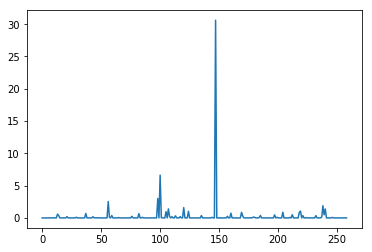

In [13]:
plt.pyplot.plot(billionaires_per_million[2007])

Wow! This is a very small data set, only 4 years worth of data!

In [14]:
fdi_data.head()

,"Foreign direct investment, net outflows (% of GDP)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.182249,0.048487,0.116287,0.139329,0.649481,0.325656,0.001586,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.019543,0.029018,0.217226,0.185977,0.155662,NaN,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
fdi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 53 columns):
Foreign direct investment, net outflows (% of GDP)    213 non-null object
1960                                                  3 non-null float64
1961                                                  3 non-null float64
1962                                                  2 non-null float64
1963                                                  2 non-null float64
1964                                                  2 non-null float64
1965                                                  3 non-null float64
1966                                                  3 non-null float64
1967                                                  5 non-null float64
1968                                                  6 non-null float64
1969                                                  6 non-null float64
1970                                                  11 non-null float64
1971             

We will need to remove the 2011 year, it is blank.

In [16]:
del fdi_data['2011']

In [17]:
pop_growth.head()

,Population growth (annual %),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1.913630,1.953067,1.993443,2.036239,2.082094,2.129662,2.147517,2.159022,2.215815,...,2.877037,2.877039,2.877035,2.877038,2.831299,2.831301,2.831300,2.831302,2.831299,2.720300
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,3.125072,3.092990,3.047613,2.992899,2.932065,2.866669,2.797541,2.726262,2.655236,...,0.402131,0.546215,0.582841,0.540608,0.470183,0.412819,0.369450,0.355375,0.361451,0.364596
4,Algeria,2.006015,1.895314,1.829341,1.864778,2.028693,2.274235,2.541045,2.764222,2.922315,...,1.472645,1.488818,1.500851,1.508506,1.519347,1.529486,1.526117,1.505228,1.471347,1.433185


In [18]:
pop_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 53 columns):
Population growth (annual %)    270 non-null object
1960                            210 non-null float64
1961                            211 non-null float64
1962                            211 non-null float64
1963                            211 non-null float64
1964                            211 non-null float64
1965                            211 non-null float64
1966                            211 non-null float64
1967                            211 non-null float64
1968                            211 non-null float64
1969                            211 non-null float64
1970                            211 non-null float64
1971                            211 non-null float64
1972                            211 non-null float64
1973                            211 non-null float64
1974                            211 non-null float64
1975                            211 non-null flo

### Data Cleaning/ Merging

> Note: A some cleaning was perfromed in exploration

First we will chagne the column names for democracy_data, and total_pop so we can merge with billionaires_per_million

Inner Joins will be used so we only see data that is comperable to all sets

In [19]:
democracy_data.rename(columns = lambda x: str(x), inplace = True)

democracy_data.rename(columns = lambda x: x[:10] + "_demo", inplace = True)
democracy_data.rename(columns = {'Democracy,_demo': 'Country'}, inplace = True)

In [20]:
democracy_data.head()

,Country,1800_demo,1801_demo,1802_demo,1803_demo,1804_demo,1805_demo,1806_demo,1807_demo,1808_demo,...,2002_demo,2003_demo,2004_demo,2005_demo,2006_demo,2007_demo,2008_demo,2009_demo,2010_demo,2011_demo
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,-3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


Looks like it worked, all of our columns for the democracy data how have a "demo" notation at the end. 
We will do this for the total_pop data as well and then merge to billionaires_per_million

In [21]:
total_pop.rename(columns = lambda x: str(x), inplace = True)
total_pop.rename(columns = lambda x: x[:10] + "_pop", inplace = True)
total_pop.rename(columns = {'Total popu_pop': 'Country'}, inplace = True)
total_pop.head()

,Country,1800_pop,1810_pop,1820_pop,1830_pop,1840_pop,1850_pop,1860_pop,1870_pop,1880_pop,...,2006_pop,2007_pop,2008_pop,2009_pop,2010_pop,2011_pop,2012_pop,2013_pop,2014_pop,2015_pop
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


In [22]:
billionaires_per_million.rename(columns = lambda x: str(x), inplace = True)

billionaires_per_million.rename(columns = lambda x: x[:10] + "_billion", inplace = True)
billionaires_per_million.rename(columns = {'Billionair_billion': 'Country'}, inplace = True)
billionaires_per_million.head()


,Country,2004_billion,2005_billion,2006_billion,2007_billion
0,Abkhazia,0.0,0.0,0.0,0.0
1,Afghanistan,0.0,0.0,0.0,0.0
2,Akrotiri and Dhekelia,0.0,0.0,0.0,0.0
3,Albania,0.0,0.0,0.0,0.0
4,Algeria,0.0,0.0,0.0,0.0


In [23]:
df_pop_and_demo = total_pop.merge(democracy_data, left_on='Country', right_on='Country', how = 'inner')

In [24]:
df_comb_billionaires = df_pop_and_demo.merge(billionaires_per_million, left_on='Country', right_on='Country', how='inner')
df_comb_billionaires.head()

,Country,1800_pop,1810_pop,1820_pop,1830_pop,1840_pop,1850_pop,1860_pop,1870_pop,1880_pop,...,2006_demo,2007_demo,2008_demo,2009_demo,2010_demo,2011_demo,2004_billion,2005_billion,2006_billion,2007_billion
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,9.0,9.0,9.0,9.0,9.0,9.0,0.0,0.0,0.0,0.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0


removing extra "countries" column 

In [25]:
df_comb_billionaires.head()

,Country,1800_pop,1810_pop,1820_pop,1830_pop,1840_pop,1850_pop,1860_pop,1870_pop,1880_pop,...,2006_demo,2007_demo,2008_demo,2009_demo,2010_demo,2011_demo,2004_billion,2005_billion,2006_billion,2007_billion
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,9.0,9.0,9.0,9.0,9.0,9.0,0.0,0.0,0.0,0.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0


Now lets combine the FDI, working hours and billionaries data as well

In [26]:
fdi_data.rename(columns = lambda x: str(x), inplace = True)
fdi_data.rename(columns = lambda x: x[:10] + "_fdi", inplace = True)
fdi_data.rename(columns = {'Foreign di_fdi': 'Country'}, inplace = True)
fdi_data.head()

,Country,1960_fdi,1961_fdi,1962_fdi,1963_fdi,1964_fdi,1965_fdi,1966_fdi,1967_fdi,1968_fdi,...,2001_fdi,2002_fdi,2003_fdi,2004_fdi,2005_fdi,2006_fdi,2007_fdi,2008_fdi,2009_fdi,2010_fdi
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.182249,0.048487,0.116287,0.139329,0.649481,0.325656,0.001586
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.019543,0.029018,0.217226,0.185977,0.155662,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
fdi_data.describe()

,1960_fdi,1961_fdi,1962_fdi,1963_fdi,1964_fdi,1965_fdi,1966_fdi,1967_fdi,1968_fdi,1969_fdi,...,2001_fdi,2002_fdi,2003_fdi,2004_fdi,2005_fdi,2006_fdi,2007_fdi,2008_fdi,2009_fdi,2010_fdi
count,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,5.000000,6.000000,6.000000,...,99.000000,105.000000,111.000000,116.000000,120.000000,118.000000,122.000000,124.000000,120.000000,107.000000
mean,0.061986,0.126217,0.271643,0.318455,0.183083,0.195845,0.179765,0.971852,0.812451,0.862075,...,1.452749,1.180740,1.215564,1.590965,2.238818,2.431281,3.255752,2.269851,1.563208,1.157988
std,0.084998,0.101694,0.265936,0.333752,0.126964,0.098618,0.059846,1.770471,1.526759,1.613210,...,3.365135,2.257039,2.703474,3.929259,5.642964,4.894804,7.520755,6.570616,3.901297,6.276239
min,-0.034637,0.028678,0.083597,0.082457,0.093305,0.109190,0.121957,0.017272,0.033793,-0.065674,...,-5.484862,-1.412820,-10.359872,-4.057538,-4.873191,-0.882568,-0.346053,-22.494274,-8.698704,-35.560074
25%,0.030371,0.073520,0.177620,0.200456,0.138194,0.142191,0.148918,0.153019,0.090452,0.069701,...,0.029809,0.035428,0.035313,0.027875,0.050896,0.084583,0.087942,0.054946,0.066332,0.044882
50%,0.095379,0.118362,0.271643,0.318455,0.183083,0.175192,0.175879,0.175114,0.157166,0.191003,...,0.254075,0.202143,0.207396,0.198014,0.362569,0.675585,0.745011,0.582285,0.491117,0.408524
75%,0.110298,0.174987,0.365665,0.436454,0.227971,0.239173,0.208669,0.383570,0.453070,0.584209,...,1.512485,1.407697,1.608967,1.476407,1.889729,2.622137,2.952245,2.605111,1.715006,1.519378
max,0.125216,0.231611,0.459688,0.554454,0.272860,0.303154,0.241460,4.130285,3.906664,4.111571,...,21.903502,12.698446,12.826842,27.557823,43.681541,33.361426,50.062537,45.869579,30.577810,42.508676


In [28]:
hours_per_week.rename(columns = lambda x: str(x), inplace = True)
hours_per_week.rename(columns = lambda x: x[:10] + "_hrs", inplace = True)
hours_per_week.rename(columns = {"Working ho_hrs": 'Country'}, inplace = True)
hours_per_week.head()

,Country,1980_hrs,1981_hrs,1982_hrs,1983_hrs,1984_hrs,1985_hrs,1986_hrs,1987_hrs,1988_hrs,...,1998_hrs,1999_hrs,2000_hrs,2001_hrs,2002_hrs,2003_hrs,2004_hrs,2005_hrs,2006_hrs,2007_hrs
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,34.578846,34.578846,34.376923,34.117307,34.415384,34.338461,34.482692,34.655769,34.819230,...,34.394231,34.363462,34.332693,33.742307,33.467309,33.411539,33.596154,33.298077,33.140386,33.109614
2,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.990385,31.492307,31.378845,31.351924,31.384615,31.567308,31.736539,31.844231,31.817308,31.761345
3,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belgium,NaN,NaN,NaN,34.000000,34.480769,34.596154,34.211538,33.903846,33.653846,...,32.153846,30.403846,29.884615,30.326923,30.365385,30.288462,29.788462,30.096154,30.211538,30.115385


In [29]:
df_hrs_fdi_billion = hours_per_week.merge(fdi_data, left_on= "Country", right_on="Country", how = 'inner')
df_hrs_fdi_billion = df_hrs_fdi_billion.merge(billionaires_per_million, left_on='Country', right_on='Country', how='inner')
df_hrs_fdi_billion.head()

,Country,1980_hrs,1981_hrs,1982_hrs,1983_hrs,1984_hrs,1985_hrs,1986_hrs,1987_hrs,1988_hrs,...,2005_fdi,2006_fdi,2007_fdi,2008_fdi,2009_fdi,2010_fdi,2004_billion,2005_billion,2006_billion,2007_billion
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.715670,1.139232,0.576845,0.425779,0.231714,0.261640,0.025546,0.025292,0.025049,0.024813
1,Australia,34.578846,34.578846,34.376923,34.117307,34.415384,34.338461,34.482692,34.655769,34.819230,...,-4.873191,3.191907,2.329603,3.589952,1.701020,2.167371,0.251090,0.298650,0.345439,0.587251
2,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.834874,2.632864,19.086441,7.131380,3.119058,-5.375687,0.366983,0.488717,0.366172,0.365863
3,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003218,NaN,NaN,NaN,NaN,0.000258,0.000000,0.000000,0.000000,0.000000
4,Belgium,NaN,NaN,NaN,34.000000,34.480769,34.596154,34.211538,33.903846,33.653846,...,8.626730,12.541158,18.176621,42.131045,1.402590,10.198139,0.096634,0.096484,0.192696,0.192452


In [30]:
df_hrs_fdi_billion.describe()

,1980_hrs,1981_hrs,1982_hrs,1983_hrs,1984_hrs,1985_hrs,1986_hrs,1987_hrs,1988_hrs,1989_hrs,...,2005_fdi,2006_fdi,2007_fdi,2008_fdi,2009_fdi,2010_fdi,2004_billion,2005_billion,2006_billion,2007_billion
count,15.000000,15.000000,15.000000,20.000000,20.000000,20.000000,22.000000,23.000000,23.000000,23.000000,...,46.000000,45.000000,46.000000,46.000000,46.000000,47.000000,52.000000,52.000000,52.000000,52.000000
mean,35.995013,35.730000,35.638359,36.066529,35.886836,35.849625,35.855210,35.523838,35.514331,35.309774,...,4.156344,4.416503,6.246846,4.340666,2.882517,1.548850,0.213319,0.301898,0.328206,0.426290
std,5.988791,6.137520,6.195269,5.704233,5.598043,5.513844,5.377847,5.357342,5.213405,4.943303,...,8.267109,6.836772,11.101700,10.164576,5.438825,9.272922,0.371579,0.595327,0.610440,1.011311
min,29.169232,29.007693,29.278846,29.457693,29.500000,29.578846,29.540384,29.050000,29.019231,28.788462,...,-4.873191,-0.141774,-0.189911,-22.494274,-1.104178,-35.560074,0.000000,0.000000,0.000000,0.000000
25%,34.332692,33.661539,33.608654,33.833655,33.552404,33.805288,33.848558,33.459616,33.408269,33.161539,...,0.247973,0.533622,0.488973,0.369873,0.267948,0.111559,0.000000,0.000000,0.000000,0.000000
50%,34.849999,34.634615,34.376923,34.567308,34.448077,34.467307,34.478845,34.582693,34.736539,34.661539,...,1.057133,2.267915,2.104514,2.085561,1.356015,1.060923,0.044285,0.070247,0.093315,0.101510
75%,35.796251,35.789423,35.743270,36.578702,36.347260,36.330433,37.016154,37.004904,37.020962,37.050866,...,3.667665,4.106976,6.458047,5.356735,3.082993,2.707928,0.242137,0.262529,0.350622,0.393688
max,55.307692,55.615385,55.865385,56.211538,56.134615,55.653846,56.211538,55.615385,54.730769,52.730769,...,43.681541,33.361426,50.062537,45.869579,30.577810,42.508676,2.042268,3.369988,3.340147,6.624030


>These are the values will will likely want to explore, the "describe" function provides us with a great deal of pre-generated info we can work with a chart. 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


### Is there a relationship between Democracy, Populations and  Billionaires per 1 million inhabitants?? 

This question is quite broad and will be further refined as analysis develops

Lets first get a handle of the countries that have billionaires and which ones have lots! For the sake of simplicity we will only look at the countries that do have some billionaires recorded in our data. As mentioned before these can be considered outliers, thats exactly what we want to look at here, the outliers. 

In [31]:
df = df_comb_billionaires
df = df[(df.iloc[:,-4] != 0) & (df.iloc[:,-3] != 0) & (df.iloc[:,-2] != 0) & (df.iloc[:,-1] != 0)] # looking at last 4 columns, removes row if all are zero
df.head()

,Country,1800_pop,1810_pop,1820_pop,1830_pop,1840_pop,1850_pop,1860_pop,1870_pop,1880_pop,...,2006_demo,2007_demo,2008_demo,2009_demo,2010_demo,2011_demo,2004_billion,2005_billion,2006_billion,2007_billion
10,Argentina,534000.0,534000.0,570719.0,686703.0,873747.0,1113189.0,1421333.0,1856886.0,2493156.0,...,8.0,8.0,8.0,8.0,8.0,8.0,0.025546,0.025292,0.025049,0.024813
13,Australia,351014.0,342440.0,334002.0,348143.0,434095.0,742619.0,1256048.0,1724213.0,2253007.0,...,10.0,10.0,10.0,10.0,10.0,10.0,0.251090,0.298650,0.345439,0.587251
14,Austria,3205587.0,3286650.0,3391206.0,3538286.0,3728381.0,3962619.0,4235926.0,4556658.0,4947026.0,...,10.0,10.0,10.0,10.0,10.0,10.0,0.366983,0.488717,0.366172,0.365863
21,Belgium,3138137.0,3283959.0,3475782.0,3751571.0,4087429.0,4426000.0,4753088.0,5110891.0,5572208.0,...,10.0,8.0,8.0,8.0,8.0,8.0,0.096634,0.096484,0.192696,0.192452
29,Brazil,3639636.0,4058652.0,4582325.0,5301068.0,6206694.0,7254194.0,8466005.0,9964419.0,11893392.0,...,8.0,8.0,8.0,8.0,8.0,8.0,0.032591,0.042985,0.085071,0.105257


Now we have a condenseded data set we can use for exploration. 

In [32]:
df_comb_billionaires = df


> Couple things 
>>We might have to approach this differently, as in looking at and graphing off each file 
>>We need to remove Taiwan for only having NaN's for Population values and Hong Kong for the same reasons in the democracy data

In [33]:
df = billionaires_per_million 
billion_clean = df[(df.iloc[:,-4] != 0) & (df.iloc[:,-3] != 0) & (df.iloc[:,-2] != 0) & (df.iloc[:,-1] != 0)]
billion_clean.describe()

,2004_billion,2005_billion,2006_billion,2007_billion
count,42.000000,42.000000,42.000000,42.000000
mean,0.374554,0.396563,0.461059,0.516672
std,0.419641,0.445238,0.544275,0.611093
min,0.000772,0.001535,0.006103,0.008947
25%,0.081731,0.082546,0.087070,0.093542
50%,0.205584,0.237300,0.241687,0.348269
75%,0.546373,0.656675,0.666640,0.683486
max,2.042268,2.174327,2.449415,3.008418


In [34]:
billion_clean.head()

,Country,2004_billion,2005_billion,2006_billion,2007_billion
10,Argentina,0.025546,0.025292,0.025049,0.024813
13,Australia,0.251090,0.298650,0.345439,0.587251
14,Austria,0.366983,0.488717,0.366172,0.365863
21,Belgium,0.096634,0.096484,0.192696,0.192452
29,Brazil,0.032591,0.042985,0.085071,0.105257


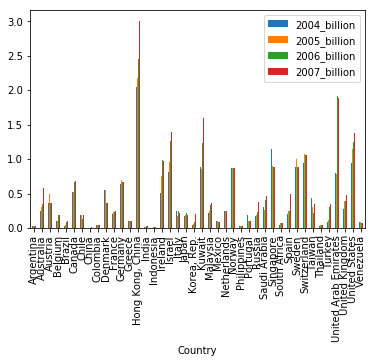

In [37]:


billion_clean = billion_clean.set_index('Country')

billion_clean.plot(kind = 'bar')

In [ ]:
plt.subplot()

### Does higher levels Forigen Direct Investment (FDI) and/or more working hours lead to more billionares per 1million inhabitants??

This question is quite broad and will be further refined as analysis develops

In [36]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
hours_info =hours_per_week.describe()
hours_info.head()

,1980_hrs,1981_hrs,1982_hrs,1983_hrs,1984_hrs,1985_hrs,1986_hrs,1987_hrs,1988_hrs,1989_hrs,...,1998_hrs,1999_hrs,2000_hrs,2001_hrs,2002_hrs,2003_hrs,2004_hrs,2005_hrs,2006_hrs,2007_hrs
count,15.000000,15.000000,15.000000,20.000000,20.000000,20.000000,22.000000,23.000000,23.000000,23.000000,...,31.000000,38.000000,29.000000,29.000000,29.000000,29.000000,30.000000,30.000000,28.000000,24.000000
mean,35.995013,35.730000,35.638359,36.066529,35.886836,35.849625,35.855210,35.523838,35.514331,35.309774,...,34.505081,34.323568,34.136976,33.816180,33.593568,33.411764,33.555096,33.532289,33.116614,32.655937
std,5.988791,6.137520,6.195269,5.704233,5.598043,5.513844,5.377847,5.357342,5.213405,4.943303,...,4.057416,3.798066,4.430101,4.330121,4.320902,4.215385,4.061631,3.996811,3.756277,3.260047
min,29.169232,29.007693,29.278846,29.457693,29.500000,29.578846,29.540384,29.050000,29.019231,28.788462,...,26.923077,26.557692,26.384615,26.384615,25.923077,26.211538,26.192308,26.442308,26.750000,26.769231
25%,34.332692,33.661539,33.608654,33.833655,33.552404,33.805288,33.848558,33.459616,33.408269,33.161539,...,32.123077,32.250000,31.378845,31.351924,31.332693,31.346154,30.809135,31.128799,30.710529,30.094808


We need to import another matplotlib module "figure"

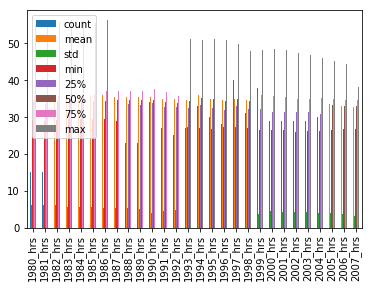

In [34]:
hours_t = hours_info.T
hours_t.plot(kind = 'bar')

In [35]:
matplotlib.figure.Figure(figsize=(50,50))
hours_info.T[['mean']].plot(kind ='bar')
matplotlib.figure.Figure(figsize=(50,50))

NameError: name 'matplotlib' is not defined

<IPython.core.display.Javascript object>


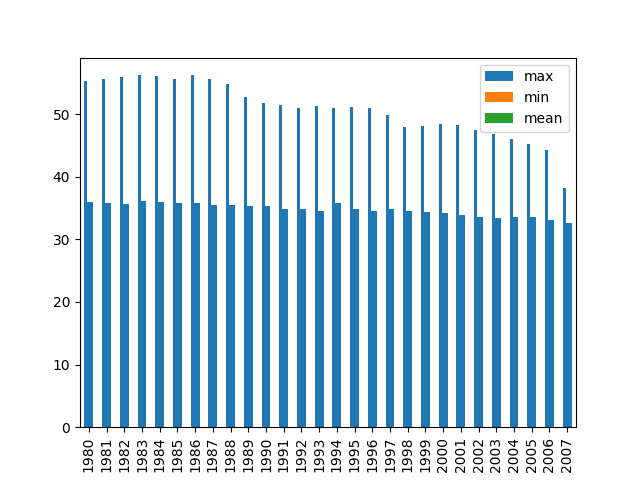

In [24]:
hours_info.T[['max', 'min', 'mean']].plot(kind ='bar')

We can see that he average number of working hours is going down with the max decreasing significantly. 

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])